In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
data=pd.read_csv("/content/sample_data/Test_set.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
for i in category:
  print(i, data[i].unique())

NameError: ignored

In [ ]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [6, 06, 2019]
1       [12, 05, 2019]
2       [21, 05, 2019]
3       [21, 05, 2019]
4       [24, 06, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 2671, dtype: object

In [ ]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [ ]:
data.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
data.Route=data.Route.str.split('->')
data.Route

0       [DEL ? BOM ? COK]
1       [CCU ? MAA ? BLR]
2       [DEL ? BOM ? COK]
3       [DEL ? BOM ? COK]
4             [BLR ? DEL]
              ...        
2666    [CCU ? DEL ? BLR]
2667          [CCU ? BLR]
2668    [DEL ? BOM ? COK]
2669    [DEL ? BOM ? COK]
2670    [DEL ? BOM ? COK]
Name: Route, Length: 2671, dtype: object

In [ ]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_time_Mins']=data.Dep_Time.str[1]

In [ ]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]


In [ ]:
data.Duration=data.Duration.str.split('')
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [ ]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Date                    0
Month                   0
Year                    0
City1                   0
City2                2671
City3                2671
City4                2671
City5                2671
City6                2671
Dep_Time_Hour           0
Dep_time_Mins           0
Arrival_date         1605
Time_of_Arrival         0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins             0
dtype: int64

In [ ]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)


In [ ]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Date                    0
Month                   0
Year                    0
City1                   0
City2                2671
City3                2671
City4                2671
City5                2671
City6                2671
Dep_Time_Hour           0
Dep_time_Mins           0
Arrival_date         1605
Time_of_Arrival         0
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins             0
dtype: int64

In [ ]:
data['City3'].fillna('None',inplace=True)

In [ ]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [ ]:
data['Travel_Mins'].fillna(0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            2671 non-null   object 
 1   Date_of_Journey    2671 non-null   object 
 2   Source             2671 non-null   object 
 3   Destination        2671 non-null   object 
 4   Route              2671 non-null   object 
 5   Dep_Time           2671 non-null   object 
 6   Arrival_Time       2671 non-null   object 
 7   Duration           2671 non-null   object 
 8   Total_Stops        2671 non-null   object 
 9   Additional_Info    2671 non-null   object 
 10  Date               2671 non-null   object 
 11  Month              2671 non-null   object 
 12  Year               2671 non-null   object 
 13  City1              2671 non-null   object 
 14  City2              0 non-null      float64
 15  City3              2671 non-null   object 
 16  City4              0 non

In [ ]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')


In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('object')

In [ ]:
data[data['Travel_Hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins


In [ ]:
data.drop(index=1274,inplace=True,axis=0)

In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('object')

In [ ]:
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.head()




,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,4,"[6, 06, 2019]",2,1,[DEL ? BOM ? COK],"[17, 30]","[04:25, 07, Jun]","[, 1, 0, h, , 5, 5, m, ]",0,No info,...,NaN,NaN,17,30,7,"[04, 25]",4,25,,1
1,3,"[12, 05, 2019]",3,0,[CCU ? MAA ? BLR],"[06, 20]",[10:20],"[, 4, h, ]",0,No info,...,NaN,NaN,6,20,12,"[10, 20]",10,20,,4
2,4,"[21, 05, 2019]",2,1,[DEL ? BOM ? COK],"[19, 15]","[19:00, 22, May]","[, 2, 3, h, , 4, 5, m, ]",0,In-flight meal not included,...,NaN,NaN,19,15,22,"[19, 00]",19,0,,2
3,6,"[21, 05, 2019]",2,1,[DEL ? BOM ? COK],"[08, 00]",[21:00],"[, 1, 3, h, ]",0,No info,...,NaN,NaN,8,00,21,"[21, 00]",21,0,,1
4,0,"[24, 06, 2019]",0,2,[BLR ? DEL],"[23, 55]","[02:45, 25, Jun]","[, 2, h, , 5, 0, m, ]",4,No info,...,NaN,NaN,23,55,25,"[02, 45]",2,45,,2


In [ ]:
data = data[['Airline','source','destination','date','month','year','dep_time_hour','dep_time_mins','arrival_date','arrival_time_hour','arrival_time_mins','price']]

KeyError: ignored

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City5,City6,Dep_Time_Hour,Dep_time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,4,"[6, 06, 2019]",2,1,[DEL ? BOM ? COK],"[17, 30]","[04:25, 07, Jun]","[, 1, 0, h, , 5, 5, m, ]",0,No info,...,NaN,NaN,17,30,7,"[04, 25]",4,25,,1
1,3,"[12, 05, 2019]",3,0,[CCU ? MAA ? BLR],"[06, 20]",[10:20],"[, 4, h, ]",0,No info,...,NaN,NaN,6,20,12,"[10, 20]",10,20,,4
2,4,"[21, 05, 2019]",2,1,[DEL ? BOM ? COK],"[19, 15]","[19:00, 22, May]","[, 2, 3, h, , 4, 5, m, ]",0,In-flight meal not included,...,NaN,NaN,19,15,22,"[19, 00]",19,0,,2
3,6,"[21, 05, 2019]",2,1,[DEL ? BOM ? COK],"[08, 00]",[21:00],"[, 1, 3, h, ]",0,No info,...,NaN,NaN,8,00,21,"[21, 00]",21,0,,1
4,0,"[24, 06, 2019]",0,2,[BLR ? DEL],"[23, 55]","[02:45, 25, Jun]","[, 2, h, , 5, 0, m, ]",4,No info,...,NaN,NaN,23,55,25,"[02, 45]",2,45,,2


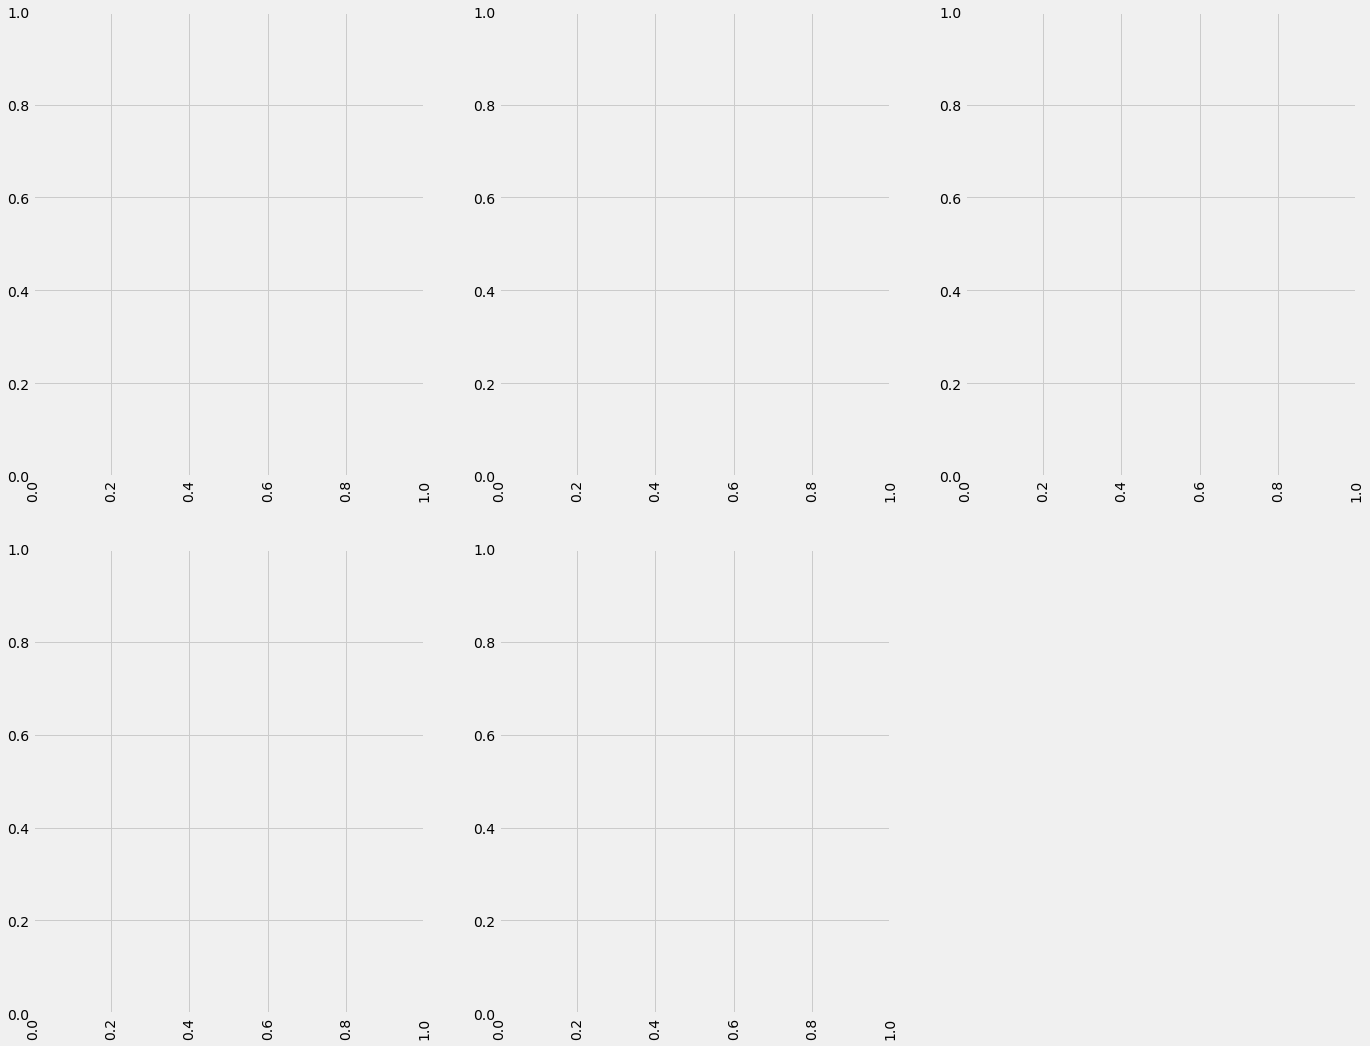

In [ ]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
  plt.subplot(6,3,c)
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1

plt.show()


In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(data.price)


AttributeError: ignored

<Figure size 1080x576 with 0 Axes>

<Axes: >

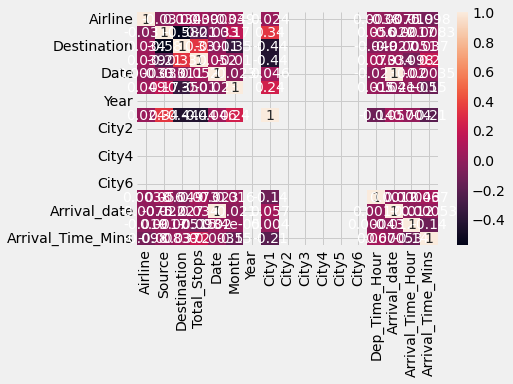

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
import seaborn as sns
sns.boxplot(data['Price'])

KeyError: ignored

In [ ]:
y = data['price']
x = data.drop(column=['Price'],axis=1)


KeyError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [ ]:
x_scaled = ss.fit_transform(x)



NameError: ignored

In [ ]:
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

NameError: ignored

In [ ]:
x_train.head()

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_log_error

for i in [rfr,gb,ad]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train, i.predict(x_train))
  if abs(train_score-test_score)<=0.2:
    print(i)
    
    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Abosolute Error is",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is" (mean_squared_error(y_pred,y_test,squared=False)))



NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [Knn,svr,dt]:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  test_score=r2_score(y_test,y_pred)
  train_score=r2_score(y_train,i,predict(x_train))
  if abs(train_score-test_score)<=0.1:
    print(i)
    print('R2 Score is',r2_score(y_test,y_pred))
    print('R2 Score for train data'r2_score(y_train,i.predict(x_train)))
    print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
    print('Root Mean squared Error is'(mean_squared_error(y_test,y_pred,squared=False)))



SyntaxError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
  cv=cross_val_score(rfr,x,y,cv=i)
  print(rfr,cv.mean())
  


NameError: ignored

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3]},
           'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=randomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)






IndentationError: ignored

In [ ]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)

NameError: ignored

In [ ]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

NameError: ignored

In [ ]:
price_list=pd.DataFrame({'Price':prices})


NameError: ignored

In [1]:
price_list


NameError: ignored

In [ ]:
import pickle
pickle.dump(rfr,open('model.pkl','wb'))